# Python для анализа данных

## Работа с файлами в Python: чтение и запись текстовых файлов. Исключения. Try/except

Автор: *Татьяна Рогович, НИУ ВШЭ*

## Файловый ввод-вывод

Как правило, если указать в Python не полный путь к файлу, а только его название, то он будет искать файл в рабочей директории. Как узнать, где это?


In [1]:
import os
os.getcwd()

'/Users/mgordenko/DPO_Python_DS14-main/Lect6 files'

Функция getcwd() из модуля os возвращает нам путь к вашей рабочей папке. Так, например, в Windows по умолчанию Anaconda делает рабочей папкой для Jupyter папку пользователя в Users. Это можно изменить или глобально, прописав путь к вашей папке в свойствах, или локально в рамках сессии.

Функция chdir() принимает в качестве аргумента путь к папке и меняет рабочую директорию. Теперь к файлам, хранящимся в ней вы сможете обращаться без полного пути. Также все новые файлы будут сохраняться туда же.

In [3]:
os.chdir('/Users/mgordenko/DPO_Python_DS14-main/')
os.getcwd()
important_text = 'Это очень важный текст. В нем даже несколько строк. \nОни отделены переносом строки.'

with open('info_dir.txt', mode = 'w', encoding = 'UTF-8') as outfile:
    print(important_text, file = outfile)

In [5]:
os.chdir('//Users//mgordenko//DPO_Python_DS14-main//Lect6 files')
os.getcwd()

'/Users/mgordenko/DPO_Python_DS14-main/Lect6 files'

.listdir() вернет нам список содержимого директории. Очень полезная функция - можно запустить цикл, если нужно обработать все файлы в папке.

In [6]:
os.listdir()

['Lect6_part4_Работа_с_табличными_файлами.ipynb',
 'Lect6_part1_Чтение_из_файла_и_запись_в_файл.ipynb',
 'info.txt',
 'csv_file.csv',
 'Lect6_part3_Работа_с_текстовыми_файлами.ipynb',
 'mbox.txt',
 'temperature.csv',
 'text_file.txt',
 '.ipynb_checkpoints',
 'dochka.txt',
 'Lect6_Part2.ipynb']

Давайте попробуем создать файл, записать в него что-нибудь и сохранить.

In [13]:
file = open('text.txt', 'w', encoding = 'UTF-8')

In [14]:
file

<_io.TextIOWrapper name='text.txt' mode='w' encoding='UTF-8'>

Функция open() возвращает файловый объект и мы используем ее обычно с двумя аргументами - имя файла и режим (например, запись или чтение). Выше мы открыли файл test.txt в режиме записи 'w' (если такого файла не существовало, он будет создан).

Такой объект называется file handle или дескриптор файла.

![](https://www.py4e.com/images/handle.svg)  
Source: https://www.py4e.com/html3/07-files

Какие могут быть режимы открытия файла (mode):

* 'r' - read, только чтение
* 'w' - write, только запись (если файл с таким именем существовал, он будет удален).
* 'a' - append, новые данные будут записаны в конец файла
* 'r+' - чтение+запись.

Если не передать второй аргумент, то файл автоматически откроется в режиме чтения.

Encoding - именнованный параметр, если работаете с кириллицей или языками со спецсимволами, то лучше задать utf8.

In [15]:
file.write('Hello, world\n')
file.write('Hello, world\n')
file.write('Hello, world\n')
file.write('Hello, world\n')

13

In [16]:
file.close()

In [18]:
file = open('hello_world.txt', 'w', encoding = 'UTF-8')

for i in range(1_000_000):
    file.write('Hello, world\n')

In [19]:
# open 
# write (in buffer)
# buffer закончился - очистка и запись в файл
# файл сохраняем и закрываем

In [20]:
file = open('text.txt', 'w', encoding = 'UTF-8')

In [21]:
file.write('Hello, world\n')
file.write('Hello, world\n')
file.write('Hello, world\n')
file.write('Hello, world\n')

13

In [22]:
file.flush()

In [23]:
file.write('Hello, world\n')
file.write('Hello, world\n')
file.write('Hello, world\n')
file.write('Hello, world\n')

13

In [24]:
file.flush()

In [25]:
file.close()

In [26]:
# file.open()
# file.write()
# file.flush()
# file.close()

Метод write записал данные в наш файл. После этого файл нужно закрыть, чтобы он выгрузился из оперативной памяти. Если этого не сделать, то в какой-то момент питоновский сборщик мусора все равно до него доберется и закроет файл, но большие файлы могут съедать достаточно много ресурсов, поэтому лучше за этим следить.

Теперь дававайте попробуем открыть в режиме чтения.

In [27]:
file = open('text.txt', 'r', encoding = 'UTF-8')
print(file.read())
file.close()

Hello, world
Hello, world
Hello, world
Hello, world
Hello, world
Hello, world
Hello, world
Hello, world



После того, как мы закрыли файл, обратиться к нему больше нельзя.

In [28]:
file.read()

ValueError: I/O operation on closed file.

Хорошим тоном при работе с файлами считается открывать их с помощью ключевого слова with. Преимущество этого способа в том, что файл закроется автоматически, когда закончатся вложенные операции.

In [29]:
with open('text.txt', 'r', encoding = 'UTF-8') as file:
    print(file.read())

Hello, world
Hello, world
Hello, world
Hello, world
Hello, world
Hello, world
Hello, world
Hello, world



Еще один вариант записать данные в файл вот так:

In [30]:
with open('text.txt', 'a', encoding = 'UTF-8') as fileout:
    print('append', file = fileout)

Мы выше уже видели два метода файла .write() и .read(). Еще один метод, который очень часто используется - это readline. Он позволяет не загружать файл целиком в память, а считывать его построчно. Знаком остановки здесь будет выступать \n

In [32]:
count = 0
with open('text.txt', 'r', encoding = 'UTF-8') as file:
    count += 1
    print(count, file.readline())

1 Hello, world



.readline() - генератор. При обращении он выдает нам новую строку. 

In [38]:
count = 0
with open('text.txt', 'r', encoding = 'UTF-8') as file:
    s_file = file.readline()
    while (s_file):
        count += 1
        print(count, s_file)
        s_file = file.readline()

1 Hello, world

2 Hello, world

3 Hello, world

4 Hello, world

5 Hello, world

6 Hello, world

7 Hello, world

8 Hello, world

9 append



In [39]:
count = 0
with open('text.txt', 'r', encoding = 'UTF-8') as file:
    for line in file:
        count += 1
        print(count, line)

1 Hello, world

2 Hello, world

3 Hello, world

4 Hello, world

5 Hello, world

6 Hello, world

7 Hello, world

8 Hello, world

9 append



Также, чтобы прочитать все строки поочередно, можно запустить цикл. Тут не стоит забывать, что переменная f, хоть и прикидывается списком строк, когда мы её итерируем, на самом деле таковым не является. В действительности при открытии файла мы запоминаем позицию, на которой мы этот файл читаем. Изначально она указывает на самое начало файла, но с каждой итерацией сдвигается. Когда мы прочитаем файл целиком, дальнейшие попытки из него что-то прочитать ни к чему не приведут: указатель текущей позиции сдвинулся до самого конца и файл закончился.

In [48]:
with open('text.txt', 'r', encoding = 'UTF-8') as file:
    print(file.read(10))
    print(file.read(10))

Hello, wor
ld
1234567


Файл можно перемотать на начало, если воспользоваться методом .seek(), который возвращается к символу на этой позиции.

In [47]:
with open('text.txt', 'r', encoding = 'UTF-8') as file:
    print(file.read(10))
    file.seek(110)
    print(file.read(10))

Hello, wor
orld
appen


Если методу read() передать целое число, то питон прочитает только заданное количество символов или битов, если информация в файле записана в бинарном формате.

Чтобы считать все строки файла в список, можно вызвать список от файлового объекта или использовать метод .readlines().

In [49]:
with open('text.txt', 'r', encoding = 'UTF-8') as file:
    print(file.readlines())

['Hello, world\n', '1234567890\n', 'Hello, world\n', 'Hello, world\n', 'Hello, world\n', 'Hello, world\n', 'Hello, world\n', 'Hello, world\n', 'Hello, world\n', 'append\n']


## Пример: чтение файла построчно

Давайте откроем файл mbox.txt

В файле есть строки формата
"Date: Sat, 5 Jan 2008 09:12:18 -0500" - время, когда ушло письмо. Давайте создадим словарик, в который будем сохранять, в каком часу люди пишут письма (час от 0 до 23 - ключ, количество писем, написанных в это время, - значение).

## Try except

In [59]:
hours = {}

with open('mbox.txt') as file:
    for line in file:
        if line.startswith('Date: ') and line.endswith(')\n'):
            hour = int(line.split()[2].split(':')[0])
            hours[hour] = hours.get(hour, 0) + 1

for hour in sorted(hours):
    print(f'В {hour} было отправлено {hours[hour]} писем')

В 0 было отправлено 24 писем
В 1 было отправлено 10 писем
В 2 было отправлено 13 писем
В 3 было отправлено 17 писем
В 4 было отправлено 25 писем
В 5 было отправлено 11 писем
В 6 было отправлено 45 писем
В 7 было отправлено 41 писем
В 8 было отправлено 78 писем
В 9 было отправлено 164 писем
В 10 было отправлено 183 писем
В 11 было отправлено 149 писем
В 12 было отправлено 109 писем
В 13 было отправлено 119 писем
В 14 было отправлено 152 писем
В 15 было отправлено 178 писем
В 16 было отправлено 165 писем
В 17 было отправлено 96 писем
В 18 было отправлено 52 писем
В 19 было отправлено 48 писем
В 20 было отправлено 29 писем
В 21 было отправлено 37 писем
В 22 было отправлено 29 писем
В 23 было отправлено 16 писем


Мы будем проходить графики отдельным блоком, но давайте быстренько построим распределение отправки писем по времени суток.

Для начала создадим список отсортированных по ключам значений. Функция построения графика будет брать два аргумента - данные для шкал x и y. На x положим отсортированные ключи, а на y, соответствующие им значения.

In [60]:
sorted_values = []
sorted_keys = []
for key in sorted(hours.keys()):
    sorted_values.append(hours[key])
    sorted_keys.append(key)

<BarContainer object of 24 artists>

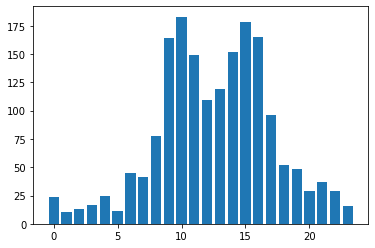

In [61]:
import matplotlib.pyplot as plt # импортировали библиотеку для построения графиков
%matplotlib inline 
# запустили "магическую" функцию, которая будет отображать графики прямо в блокноте

plt.bar(sorted_keys, sorted_values)

## Немного про исключения

Почти наверняка вы уже делали что-то, что приводило к сообщению об ошибке. Сегодня мы научимся их обрабатывать и писать собственные исключения - наши инструкции для Python, чтобы код не ломался, как только что-то пойдет не так.

Например, мы хотим открывать файл по запросу от пользователя, но хотим обработать случай, когда пользователь введет неправильное название.

Напишем блок try/except. Try будет исполняться до тех пор, пока что-то не сломается. Как только возникнет ошибка, ваша программа перейдет в часть except и выполнит действие, описанное в ней. Сообщения об ошибке выведено не будет.

Except позволил нам избежать ошибки и остановки работы программы

Естественно, try-except можно использовать не только с файлами.

Но что делать, если мы хотим пропускать только определенный вид ошибок, но видеть сообщения об остальных? Try/except хороший инструмент для отладки кода. Давайте посмотрим, как называется ошибка при попытке вызова неопределенной переменной.

`NameError: name 'y' is not defined` - название нашей ошибки NameError, давайте обрабатывать его отдельно.

А теперь давайте попробуем разделить что-нибудь на 0.

Если после вывода в except использовать ключевое слово raise, то программа закончит работу ошибкой. Отличие от того, чтобы просто не использовать except для других случаев в том, что до окончания работы программы будет выпонелнено все, что написано внутри except. Сравним.

Except может одновременно обрабатывать несколько исключений.

Except может использоваться с else - будет исполнено, если не было ошибки.

Еще один важный момент - использование ключевого слова pass. Достаточно часто пригождается при вэб-скрейпинге. Так вы можете заложить воможность того, что данные не придут в нужном формате и, например, не записывать их в ячейку таблицы, а просто пропустить.

Иногда вам может понадобиться создавать свои исключения - персонализированные сообщения об ошибке, которые валидны только для вашей программы.

Или же вы можете использовать уже существующие исключения и персонализировать сообщение об ошибке.

Давайте попробуем решить такую задачу: вы ждете от пользователя на ввод число. Будем запрашивать число до тех пор, пока не добьемся правильного ввода.